# Machine Learning Online Class - Logistic Regression
AnSon Nguyen
- <a href=#bookmark1>Logistic Regression</a>
- <a href=#bookmark2>Regularized Logistic Regression</a>

<a name='bookmark1' />
## Logistic Regression <a/>
 ### Logistic regression hypothesis
$$ h_{\theta}(x) = g(\theta^{T}x)$$
$$ g(z)=\frac{1}{1+e^{−z}} $$
 ### Cost Function
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
 ### Vectorized Cost Function
$$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

### Partial derivative - for calculating Gradient Descent
 $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
### Vectorized
$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import Series
from mpl_toolkits.mplot3d import axes3d
from scipy.optimize import minimize

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costLogistic(theta, X, y):
#Computes the cost of using theta as the parameter for Logistic regression
    m = y.size  
    h = sigmoid(np.dot( X,theta.T))
    a = np.multiply(y , np.log(h))
    b = np.multiply((1 - y) , np.log(1 - h))
    J = -1 *(1./m ) * ((a+b).sum())
    # J = (1 / m) * (np.sum(np.transpose(a + b))) Note: grad should have the same dimensions as theta
    return J

def gradientFunction(theta, X, y): #Normal fomular
    m = len(y)
    h = sigmoid(np.dot( X,theta.T))
    grad = (1. / m) * np.dot((X.T) , (h - y))
    return grad.T

def plotDecisionBoundary(theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta
      PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the
      positive examples and o for the negative examples. X is assumed to be
      a either
      1) Mx3 matrix, where the first column is an all-ones column for the
         intercept.
      2) MxN, N>3 matrix, where the first column is all-ones
    """
    # Plot Data
    plt.figure()
    plotLogisticData(X[:,1:], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([min(X[:, 2]),  max(X[:, 2])])

        # Calculate the decision boundary line
        plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = [
                np.array([mapFeature2(u[i], v[j]).dot(theta) for i in range(len(u))])
                for j in range(len(v))
            ]
        plt.contour(u,v,z, levels=[0.0])

    # Legend, specific for the exercise
    # axis([30, 100, 30, 100])
    
def mapFeature2(X1, X2, degree=6):
    """
    Feature mapping function to polynomial features
    MAPFEATURE(X, degree) maps the two input features
    to quadratic features used in the regularization exercise.
    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    """
    quads = Series([X1**(i-j) * X2**j for i in range(1,degree+1) for j in range(i+1)])
    return Series([1]).append([Series(X1), Series(X2), quads])

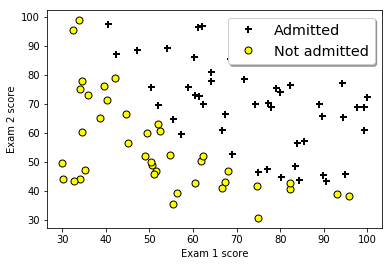

In [2]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, 0:2] # X(100,2)
y = data[:, 2] # y(100,1)

def plotLogisticData(X,y): # Logistic Data with 2 varibales
    pos = X[np.where(y==1,True,False).flatten()] # filter X made y = 1
    neg = X[np.where(y==0,True,False).flatten()] # filter X made y = 0
    plt.plot(pos[:,0], pos[:,1], '+', markersize=7, markeredgecolor='black', markeredgewidth=2)
    plt.plot(neg[:,0], neg[:,1], 'o', markersize=7, markeredgecolor='black', markerfacecolor='yellow')

plotLogisticData(X, y)
plt.legend(['Admitted', 'Not admitted'], loc='upper right', shadow=True, fontsize='x-large', numpoints=1)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

m, n = X.shape # m no of row, n no of col in X
X = np.concatenate((np.ones((m, 1)), X), axis=1) # adding the col of all 1 for theta_0

In [3]:
# Compute Cost and Gradient Descent
# Initialize fitting parameters
initial_theta = np.zeros(n + 1) # chose theta equals 0 in matrix (3x3)
cost = costLogistic(initial_theta, X, y) # calcualte the Cost of logistic regression with initial_theta
print ('Cost at initial theta (zeros): %f' % cost)

grad = gradientFunction(initial_theta, X, y)
print ('Gradient at initial theta (zeros): ' + str(grad))



Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


In [4]:
#Optimizing using SCIPY library
res = minimize(costLogistic, initial_theta, method='TNC',
               jac=False, args=(X, y), options={'gtol': 1e-3, 'disp': True, 'maxiter': 1000})
theta = res.x
cost = res.fun

print ('Cost at theta found by scipy: %f' % cost)
print ('theta:', ["%0.4f" % i for i in theta])


Cost at theta found by scipy: 0.203563
theta: ['-25.8142', '0.2111', '0.2070']


/home/annguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/home/annguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


Text(0,0.5,'Exam 2 score')

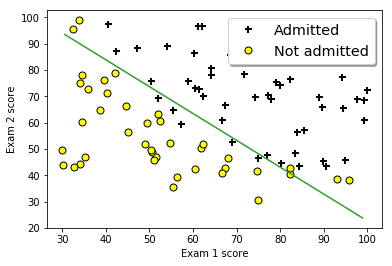

In [5]:
# Plot Boundary
plotDecisionBoundary(theta, X, y)
plt.legend(['Admitted', 'Not admitted'], loc='upper right', shadow=True, fontsize='x-large', numpoints=1)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

In [6]:
# TESTING
#computes the predictions for X using a threshold at 0.5 (i.e. if sigmoid(theta'*x) >= 0.5, predict 1)
def predict(theta, X): 
    (m,n) = X.shape
    #p = np.zeros((m,1)) 
    p = sigmoid(np.dot(X , theta.T)) 
    return [1 if x >= 0.5 else 0 for x in p]

#  Predict probability for a student with score 45 on exam 1 and score 85 on exam 2
prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print ('For a student with scores 45 and 85, we predict an admission probability of %f' % prob)

# Compute accuracy on our training set
# sử dụng theta tìm được để tính xác suất trên X, sau đó so sánh lại với y. Nếu xác suất lớn hơn or bằng 
# 0.5 trả lại kết quả 1 ngược lại trả lại 0.
p = predict(theta, X) 
print (y.shape)
acc = 1.0*np.where(p == y)[0].size/len(p) * 100 # np.where(p == y)[0].size trả về chiều dài của biến có p = y
print ('Train Accuracy: %f' % acc)

For a student with scores 45 and 85, we predict an admission probability of 0.782855
(100,)
Train Accuracy: 90.000000


<a name='bookmark2' />
### Rgularized Logistic Regression <a/>
#### Rularized Cost Function
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### Vectorized Cost Function
$$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### Plynomials Transform to get the better fiited value
Eg. eurns a new feature array with more features, comprising of  X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
#### Partial derivative
$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 
#### Vectorized
$$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$
$$\text{Note: intercept parameter } \theta_{0} \text{ is not to be regularized}$$

In [7]:
data2 = np.loadtxt('ex2data2.txt', delimiter=',')
print('Dimensions: ',data2.shape)
print(data2[1:6,:])

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


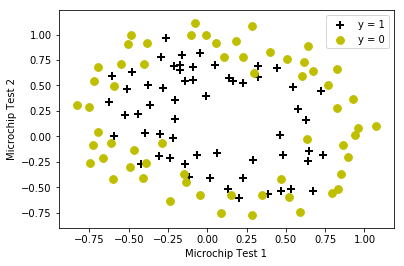

In [8]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0 # số 2 có nghĩa là 3 cột trong biến trong X
    pos = data[:,2] == 1 # number 2 means the 3 cols of features in X
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

y = np.c_[data2[:,2]]
X = data2[:,0:2]
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0') # chỉ đúng với X có 3 biến

In [9]:
# Note that this function inserts a column with 'ones' in the design matrix for the intercept.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
XX.shape

(118, 28)

In [10]:
def costFunctionReg(theta, reg, *args): # reg is learning rate of 
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())


def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))


initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.6931471805599454

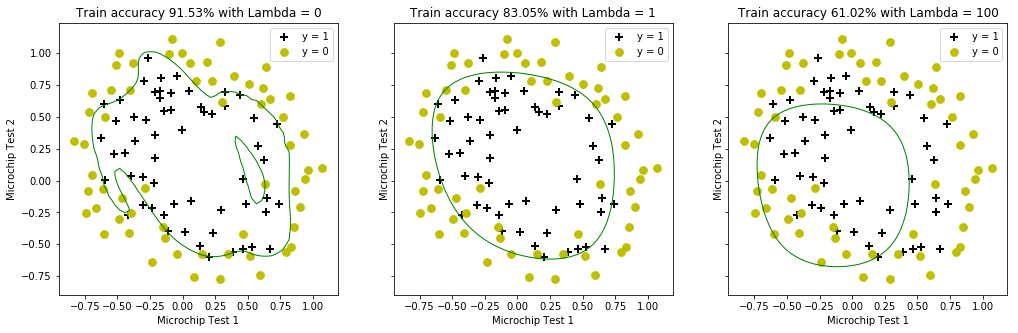

In [11]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), 
                    method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
    accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))